### Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading Datasets

### Loading raw data and saving to pickle files


##### KITTI

In [0]:
!cp "/content/drive/My Drive/kitti.zip" "kitti.zip"
!unzip kitti.zip

^C
Archive:  kitti.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of kitti.zip or
        kitti.zip.zip, and cannot find kitti.zip.ZIP, period.


In [0]:
import os
import cv2

def load_image(path):
    image = cv2.cvtColor(cv2.imread(path,-1), cv2.COLOR_BGR2RGB)
    return image

train_path1 = './data_road/training/image_2/' 

trainy_path1 = './data_road/training/gt_image_2/'

train_batch1 = os.listdir(train_path1)
trainy_batch1 = os.listdir(trainy_path1)

X_data = []
y_data = []

for sample in train_batch1:
    img_path = train_path1 + sample
    img_pathy = trainy_path1 + sample.split("_")[0] + "_road_" + sample.split("_")[1]

    print(img_path + " " + img_pathy)
    
    x = load_image(img_path)
    x = cv2.resize(x, dsize=(256,256))
    
    y = load_image(img_pathy)
    y = cv2.resize(y, dsize=(256,256))
    
    X_data.append(x)
    y_data.append(y)


./data_road/training/image_2/umm_000044.png ./data_road/training/gt_image_2/umm_road_000044.png
./data_road/training/image_2/umm_000038.png ./data_road/training/gt_image_2/umm_road_000038.png
./data_road/training/image_2/um_000085.png ./data_road/training/gt_image_2/um_road_000085.png
./data_road/training/image_2/um_000035.png ./data_road/training/gt_image_2/um_road_000035.png
./data_road/training/image_2/um_000043.png ./data_road/training/gt_image_2/um_road_000043.png
./data_road/training/image_2/um_000065.png ./data_road/training/gt_image_2/um_road_000065.png
./data_road/training/image_2/umm_000014.png ./data_road/training/gt_image_2/umm_road_000014.png
./data_road/training/image_2/uu_000092.png ./data_road/training/gt_image_2/uu_road_000092.png
./data_road/training/image_2/umm_000033.png ./data_road/training/gt_image_2/umm_road_000033.png
./data_road/training/image_2/um_000027.png ./data_road/training/gt_image_2/um_road_000027.png
./data_road/training/image_2/umm_000057.png ./data_r

In [0]:
data = {'X_train':X_data,'y_train':y_data}

with open('/content/drive/My Drive/kitti_289_256.pickle','wb') as f:
  pickle.dump(data,f)

##### Australian Dataset

In [0]:
import csv
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

X_data = []
y_data = []

def decrypt(filename):
	data = []
	with open(filename, 'rt') as f:
		reader = csv.reader(f, delimiter='\n')
		for line in reader:
			data.append(line)

	labels = {}
	for d in data:
		name, bboxs = d[0].split('.bmp ')
		name = name.split('\\')[-1]
		bboxs = bboxs.rstrip().split(' ')
		labels[name] = bboxs

	return labels

def load_image(path):
    image = cv2.cvtColor(cv2.imread(path,-1), cv2.COLOR_BGR2RGB)
    return image

###### Australian Subset 1 (Simplex)

In [0]:

test_path = "/content/drive/My Drive/Potholes Dataset/Dataset 1 (Simplex)/Train data/Positive data/"
test_batch = os.listdir(test_path)

# Getting potholes annotations
locSimplex = "/content/drive/My Drive/Potholes Dataset/Dataset 1 (Simplex)/simpleTrainFullPhotosSortedFullAnnotations.txt"
simplexLabels = decrypt(locSimplex)

for sample in test_batch:
    if '(' in sample:
      continue
    
    img_path = test_path + sample

    img = load_image(img_path)
    # img = img[:1850,:]

    gt = np.zeros((img.shape[0],img.shape[1],3), np.uint8)
    gt[:,:] = [255,0,0]

    img = cv2.resize(img, dsize=(256,256))

    # ground_truth = load_image("/content/drive/My Drive/Subset 1 (Simplex) gt/" + sample)
    # h,w,_ = ground_truth.shape
    # ground_truth = ground_truth[:,w//2:w]

    
    label = simplexLabels[sample[:-4]]
    numLabels = int(label[0])
    for i in range(numLabels):
        x,y,w,h = int(label[i*4 + 1]),int(label[i*4 + 2]),int(label[i*4 + 3]),int(label[i*4 + 4])
        gt = cv2.rectangle(gt, (x,y), (x+w,y+h), (0,0,255), -1)
    
    # ground_truth = ground_truth[:1850,:]
    ground_truth = cv2.resize(gt, dsize=(256,256))

    X_data.append(img)
    y_data.append(ground_truth)

###### Australian Subset 2 (Complex)

In [0]:
test_path = "/content/drive/My Drive/Potholes Dataset/Dataset 2 (Complex)/Train data/Positive data/"
test_batch = os.listdir(test_path)

# Getting potholes annotations
locComplex = "/content/drive/My Drive/Potholes Dataset/Dataset 2 (Complex)/complexTrainFullSizeAllPotholes.txt"
complexLabels = decrypt(locComplex)

for sample in test_batch:
    if '(' in sample:
      continue
    
    img_path = test_path + sample

    img = load_image(img_path)
    # img = img[:1850,:]

    gt = np.zeros((img.shape[0],img.shape[1],3), np.uint8)
    gt[:,:] = [255,0,0]

    img = cv2.resize(img, dsize=(256,256))

    # ground_truth = load_image("/content/drive/My Drive/Subset 2 (Complex) gt/" + sample)
    # h,w,_ = ground_truth.shape
    # ground_truth = ground_truth[:,w//2:w]

    
    label = complexLabels[sample[:-4]]
    numLabels = int(label[0])
    for i in range(numLabels):
        x,y,w,h = int(label[i*4 + 1]),int(label[i*4 + 2]),int(label[i*4 + 3]),int(label[i*4 + 4])
        gt = cv2.rectangle(gt, (x,y), (x+w,y+h), (0,0,255), -1)
    
    # ground_truth = ground_truth[:1850,:]
    ground_truth = cv2.resize(gt, dsize=(256,256))

    X_data.append(img)
    y_data.append(ground_truth)

In [0]:
X_data = np.array(X_data)
y_data = np.array(y_data)

print(X_data.shape)
print(y_data.shape)

(2634, 256, 256, 3)
(2634, 256, 256, 3)


In [0]:
# X_train = X_data[:30]
# y_train = y_data[:30]
# X_val = X_data[30:]
# y_val = y_data[30:]

data = {"X_data":X_data,"y_data":y_data}

import pickle

with open('/content/drive/My Drive/SA_only_potholes_all_256.pickle','wb') as f:
  pickle.dump(data,f)

#### IDD Potholes Dataset


In [0]:
import csv

with open('/content/drive/My Drive/train_idd1_retina.csv', 'r') as f:
    r = csv.reader(f)
    img2potholes1 = {}
    for row in r:
        img_path = "/content/drive/My Drive/" + row[0]
        pothole = (int(row[1]),int(row[2]),int(row[3]),int(row[4]))
        if img_path in img2potholes1:
            img2potholes1[img_path].append(pothole)
        else:
            img2potholes1[img_path] = [pothole]
img2potholes1.pop('/content/drive/My Drive/data/train_idd1/870692_leftImg8bit.png')
img2potholes1.pop('/content/drive/My Drive/data/train_idd1/546479_leftImg8bit.png')
img2potholes1.pop('/content/drive/My Drive/data/train_idd1/934211_leftImg8bit.png')
print(img2potholes1)

{'/content/drive/My Drive/data/train_idd1/359565_leftImg8bit.png': [(426, 412, 576, 538)], '/content/drive/My Drive/data/train_idd1/371407_leftImg8bit.png': [(419, 456, 620, 498), (652, 460, 771, 488)], '/content/drive/My Drive/data/train_idd1/421715_leftImg8bit.png': [(232, 454, 379, 518)], '/content/drive/My Drive/data/train_idd1/424343_leftImg8bit.png': [(32, 464, 460, 536)], '/content/drive/My Drive/data/train_idd1/499197_leftImg8bit.png': [(288, 366, 366, 394)], '/content/drive/My Drive/data/train_idd1/506799_leftImg8bit.png': [(99, 404, 292, 451)], '/content/drive/My Drive/data/train_idd1/536209_leftImg8bit.png': [(578, 344, 650, 378)], '/content/drive/My Drive/data/train_idd1/580002_leftImg8bit.png': [(88, 364, 160, 401)], '/content/drive/My Drive/data/train_idd1/601555_leftImg8bit.png': [(384, 429, 638, 496)], '/content/drive/My Drive/data/train_idd1/610489_leftImg8bit.png': [(26, 439, 238, 502)], '/content/drive/My Drive/data/train_idd1/647350_leftImg8bit.png': [(646, 434, 849

In [0]:
for sample in img2potholes1:
    gt_path = '/content/drive/My Drive/train_idd1_gt/' + sample.split("/")[-1][:-15] + "gtFine_polygons.png"

    x = load_image(sample)
    
    y = np.zeros((x.shape[0],x.shape[1],3), np.uint8)
    y[:,:] = [255,0,0]

    print(x.shape)
    print(y.shape)
    
    x = cv2.resize(x, dsize=(256,256))

    potholes = img2potholes1[sample]
    for pothole in potholes:
        x1,y1,x2,y2 = pothole
        y = cv2.rectangle(y, (x1,y1), (x2,y2), (0,0,255), -1)
    y = cv2.resize(y, dsize=(256, 256))
    
    X_data.append(x)
    y_data.append(y)

(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 

##### IDD Potholes Dataset Set 2

In [0]:
import csv

with open('/content/drive/My Drive/train_idd_retina.csv', 'r') as f:
    r = csv.reader(f)
    img2potholes = {}
    for row in r:
        img_path = "/content/drive/My Drive/" + row[0]
        pothole = (int(row[1]),int(row[2]),int(row[3]),int(row[4]))
        if img_path in img2potholes:
            img2potholes[img_path].append(pothole)
        else:
            img2potholes[img_path] = [pothole]

print(img2potholes)

{'/content/drive/My Drive/data/train_idd/002219_leftImg8bit.png': [(3, 425, 202, 537)], '/content/drive/My Drive/data/train_idd/490803_leftImg8bit.png': [(308, 370, 399, 406), (319, 336, 351, 355)], '/content/drive/My Drive/data/train_idd/497081_leftImg8bit.png': [(367, 354, 439, 388), (443, 334, 514, 367), (494, 386, 570, 411), (363, 407, 404, 438), (378, 430, 480, 470), (570, 508, 600, 534), (492, 468, 524, 491)], '/content/drive/My Drive/data/train_idd/497236_leftImg8bit.png': [(544, 407, 868, 536), (508, 282, 544, 302)], '/content/drive/My Drive/data/train_idd/515941_leftImg8bit.png': [(309, 395, 900, 512)], '/content/drive/My Drive/data/train_idd/516626_leftImg8bit.png': [(128, 390, 584, 455)], '/content/drive/My Drive/data/train_idd/516889_leftImg8bit.png': [(8, 450, 218, 536)], '/content/drive/My Drive/data/train_idd/526045_leftImg8bit.png': [(50, 426, 256, 502)], '/content/drive/My Drive/data/train_idd/552460_leftImg8bit.png': [(578, 322, 708, 366), (315, 282, 366, 304)], '/con

In [0]:
for sample in img2potholes:
    gt_path = '/content/drive/My Drive/train_idd_gt/' + sample.split("/")[-1][:-15] + "gtFine_polygons.png"

    x = load_image(sample)
    
    y = np.zeros((x.shape[0],x.shape[1],3), np.uint8)
    y[:,:] = [255,0,0]

    print(x.shape)
    print(y.shape)
    
    x = cv2.resize(x, dsize=(256,256))
    
    # y = load_image(gt_path)

    potholes = img2potholes[sample]
    for pothole in potholes:
        x1,y1,x2,y2 = pothole
        y = cv2.rectangle(y, (x1,y1), (x2,y2), (0,0,255), -1)
    y = cv2.resize(y, dsize=(256,256))
    
    X_data.append(x)
    y_data.append(y)

(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 960, 3)
(540, 

In [0]:
print(np.array(X_data).shape)
print(np.array(y_data).shape)

(116, 256, 256, 3)
(116, 256, 256, 3)


#### Train Test Split Data

In [0]:
from sklearn.model_selection import train_test_split

# Shuffling the data
import random
for i in range(len(X_data)-1, 0, -1): 
    j = random.randint(0, i + 1)  
    X_data[i], X_data[j] = X_data[j], X_data[i]
    y_data[i], y_data[j] = y_data[j], y_data[i]

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)

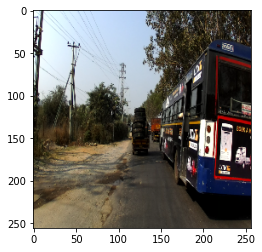

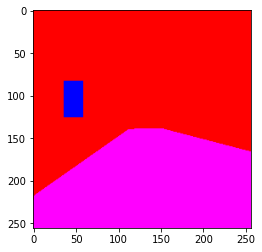

In [0]:
import matplotlib.pyplot as plt
a = 25

plt.imshow(X_train[a])
plt.show()
plt.imshow(y_train[a])
plt.show()

##### Saving IDD Potholes data to pickle file

In [0]:
import pickle

data = {"X_train":X_train,"y_train":y_train,"X_val":X_val,"y_val":y_val}

with open("/content/drive/My Drive/IDD_only_potholes_116_data.pickle",'wb') as f:
  pickle.dump(data, f)

### Loading data from pickle files

##### Loading kitti from pickle

In [0]:
import pickle

kitti_data = None

with open('/content/drive/My Drive/IBM GRM Data Used/kitti_289_256.pickle','rb') as f:
  kitti_data = pickle.load(f)

##### Loading IDD roads data from pickle file

In [0]:
import pickle 

data = None
with open("/content/drive/My Drive/IBM GRM Data Used/data_256_all.pickle",'rb') as f:
  data = pickle.load(f)

X_data = data['X_train']
y_data = data['Y_train']
del data


##### Creating a subset of IDD roads data (Optional)

In [0]:
X_train_ = []
y_train_ = []
X_val_ = []
y_val_ = []
X_test_ = []
y_test_ = []

for i in range(100):
  X_train_.append(X_train[i])
  y_train_.append(cv2.cvtColor(y_train[i],cv2.COLOR_BGR2RGB))
  X_val_.append(X_val[i])
  y_val_.append(cv2.cvtColor(y_val[i],cv2.COLOR_BGR2RGB))
  X_test_.append(X_val[100+i])
  y_test_.append(cv2.cvtColor(y_val[100+i],cv2.COLOR_BGR2RGB))

print(len(X_train_))
print(len(X_val_))
print(len(X_test_))

data = {"X_train":X_train_,"y_train":y_train_,"X_val":X_val_,"y_val":y_val_,"X_test":X_test_,"y_test":y_test_}

with open('/content/drive/My Drive/IBM GRM Data Used/idd_300_256.pickle','wb') as f:
  pickle.dump(data,f)

100
100
100


##### Loading IDD road subset from pickle

In [0]:
import pickle
idd_data = None

with open('/content/drive/My Drive/IBM GRM Data Used/idd_300_256.pickle','rb') as f:
  idd_data = pickle.load(f)

In [0]:
X_train, y_train, X_val, y_val = idd_data['X_train'],idd_data['y_train'],idd_data['X_val'],idd_data['y_val'],

##### Loading IDD with potholes

In [0]:
import pickle
iddp_data = None

with open('/content/drive/My Drive/IBM GRM Data Used/IDD_only_potholes_116_data.pickle','rb') as f:
  iddp_data = pickle.load(f)

In [0]:
X_train, y_train, X_val, y_val = iddp_data['X_train'],iddp_data['y_train'],iddp_data['X_val'],iddp_data['y_val'],

In [0]:
import pickle
iddp1_data = None

with open('/content/drive/My Drive/IBM GRM Data Used/potholesData_100_256x256.pickle','rb') as f:
  iddp1_data = pickle.load(f)

In [0]:
import pickle
iddp2_data = None

with open('/content/drive/My Drive/IBM GRM Data Used/potholesData_47_256x256.pickle','rb') as f:
  iddp2_data = pickle.load(f)

In [0]:
X = iddp1_data['X']
y = iddp1_data['y']
X2 = iddp2_data['X']
y2 = iddp2_data['y']
X_val.append(X.pop(0))
y_val.append(y.pop(0))
X_val.append(X.pop(0))
y_val.append(y.pop(0))
X_train = X_train + X + X2
y_train = y_train + y + y2

X_train = X_train
y_train = y_train

In [0]:
print(len(X_train))
print(len(X_val))

237
26


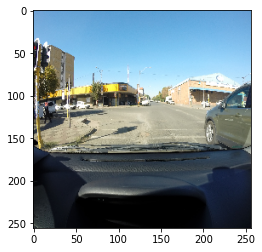

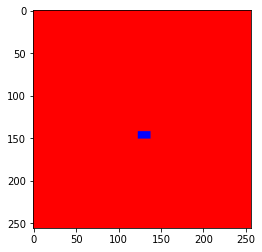

In [0]:
import matplotlib.pyplot as plt

plt.imshow(X_data[100])
plt.show()
plt.imshow(y_data[100])
plt.show()

##### Loading South Australian road data

In [0]:
import pickle
sa_data = None

with open('/content/drive/My Drive/IBM GRM Data Used/SA_256.pickle','rb') as f:
  sa_data = pickle.load(f)

In [0]:
X_train, y_train, X_val, y_val = sa_data['X_train'],sa_data['y_train'],sa_data['X_val'],sa_data['y_val'],

##### Loading South Australian with potholes

In [0]:
import pickle
sap_data = None

with open('/content/drive/My Drive/IBM GRM Data Used/SA_only_potholes_256.pickle','rb') as f:
  sap_data = pickle.load(f)

In [0]:
X_train, y_train, X_val, y_val = sap_data['X_train'],sap_data['y_train'],sap_data['X_val'],sap_data['y_val'],

### Combining datasets

#### KITTI + IDD

In [0]:
import numpy as np
X_train = np.array(kitti_data['X_train'][:250]+idd_data['X_train']+idd_data['X_test'])
y_train = np.array(kitti_data['y_train'][:250]+idd_data['y_train']+idd_data['y_test'])
X_val = np.array(kitti_data['X_train'][250:]+idd_data['X_val'][:40])
y_val = np.array(kitti_data['y_train'][250:]+idd_data['y_val'][:40])

#### KITTI + SA

In [0]:
import numpy as np
X_train = np.array(kitti_data['X_train'][:250]+list(sa_data['X_train'])+list(sa_data['X_val'][:10]))
y_train = np.array(kitti_data['y_train'][:250]+list(sa_data['y_train'])+list(sa_data['X_val'][:10]))
X_val = np.array(kitti_data['X_train'][250:]+list(sa_data['X_val'][10:]))
y_val = np.array(kitti_data['y_train'][250:]+list(sa_data['y_val'][10:]))

#### IDD + SA only potholes

In [0]:
import numpy as np
X_train = np.array(iddp_data['X_train']+list(sap_data['X_train']))
y_train = np.array(iddp_data['y_train']+list(sap_data['y_train']))
X_val = np.array(iddp_data['X_val']+list(sap_data['X_val']))
y_val = np.array(iddp_data['y_val']+list(sap_data['y_val']))

In [0]:
import numpy as np

## If want to split data into train test
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(np.array(kitti_data['X_train']), np.array(kitti_data['y_train']), test_size=0.15)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(5594, 256, 256, 3)
(5594, 256, 256, 3)
(1399, 256, 256, 3)
(1399, 256, 256, 3)


### Utility Functions

In [7]:
import os

def one_hot_it(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes

    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
   
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map
    
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.

    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """

    x = np.argmax(image, axis = -1)
    return x


def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.

    # Arguments
        image: single channel array where each value represents the class key.
        label_values
        
    # Returns
        Colour coded image for segmentation visualization
    """

    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x


def get_label_values(use_case):
    if use_case == "road":
      class_names_list = ['background','road']
      label_values = [[255,0,0],[255,0,255]] # If predicting only road
    elif use_case == "potholes":
      class_names_list = ['background','pothole']
      label_values = [[255,0,0],[255,0,255]] # If predicting only potholes
    else:
      class_names_list = ['background','road','pothole']
      label_values = [[255,0,0],[255,0,255],[0,0,255]] # If predicting both road and potholes
    num_classes = len(label_values)

    return label_values, class_names_list, num_classes

print('Preparing label values..')
label_values, _, _ = get_label_values("road")
print("Done")

Preparing label values..
Done


### Model

#### Attention Refinement Module

In [8]:
%tensorflow_version 1.x
import tensorflow as tf

from keras.layers import *
from keras.applications import *
from keras.applications.xception import preprocess_input
from keras.models import Model

def ConvAndBatch(x, n_filters=64, kernel=(2, 2), strides=(1, 1), padding='valid', activation='relu'):
    filters = n_filters

    conv_ = Conv2D(filters=filters,
                   kernel_size=kernel,
                   strides=strides,
                   padding=padding)

    batch_norm = BatchNormalization()

    activation = Activation(activation)

    x = conv_(x)
    x = batch_norm(x)
    x = activation(x)

    return x


def ConvAndAct(x, n_filters, kernel=(1, 1), activation='relu', pooling=False):
    poolingLayer = AveragePooling2D(pool_size=(1, 1), padding='same')
    convLayer = Conv2D(filters=n_filters,
                       kernel_size=kernel,
                       strides=1)

    activation = Activation(activation)

    if pooling:
        x = poolingLayer(x)

    x = convLayer(x)
    x = activation(x)

    return x

def AttentionRefinmentModule(inputs, n_filters):
    filters = n_filters

    poolingLayer = AveragePooling2D(pool_size=(1, 1), padding='same')

    x = poolingLayer(inputs)
    x = ConvAndBatch(x, kernel=(1, 1), n_filters=filters, activation='sigmoid')

    return multiply([inputs, x])

def FeatureFusionModule(input_f, input_s, n_filters):
    concatenate = Concatenate(axis=-1)([input_f, input_s])

    branch0 = ConvAndBatch(concatenate, n_filters=n_filters, kernel=(3, 3), padding='same')
    branch_1 = ConvAndAct(branch0, n_filters=n_filters, pooling=True, activation='relu')
    branch_1 = ConvAndAct(branch_1, n_filters=n_filters, pooling=False, activation='sigmoid')

    x = multiply([branch0, branch_1])
    return Add()([branch0, x])


def ContextPath(layer_13, layer_14):
    """
    block 1 : (?, 32, 32, 256)
    block 2 : (?, 32, 32, 256)
    block 2 scaled : (?, 32, 32, 256)
    block 1 : (?, 128, 128, 256)
    block 2 scaled : (?, 128, 128, 256)
    cnc : (?, 128, 128, 512)
    (?, 128, 128, 512)
    (?, 32, 32, 256)
    """
    globalmax = GlobalAveragePooling2D()

    block1 = AttentionRefinmentModule(layer_13, n_filters=256)
    block2 = AttentionRefinmentModule(layer_14, n_filters=256)

    global_channels = globalmax(block2)
    block2_scaled = multiply([global_channels, block2])

    cnc = Concatenate(axis=-1)([block1, block2_scaled])

    return cnc


def FinalModel(x, layer_13, layer_14):
    # context path
    cp = ContextPath(layer_13, layer_14)
    fusion = FeatureFusionModule(cp, x, 256)

    return fusion

TensorFlow 1.x selected.


Using TensorFlow backend.


#### Proposed Network Code

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

%tensorflow_version 1.x
import tensorflow as tf

from keras.models import Model
from keras import layers
from keras.layers import Input, Flatten
from keras.layers import Lambda
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Add
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import DepthwiseConv2D
from keras.layers import ZeroPadding2D
from keras.layers import GlobalAveragePooling2D
from keras.utils.layer_utils import get_source_inputs
from keras.utils.data_utils import get_file
from keras import backend as K

WEIGHTS_PATH_X = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5"
WEIGHTS_PATH_MOBILE = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.1/deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels.h5"
WEIGHTS_PATH_X_CS = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.2/deeplabv3_xception_tf_dim_ordering_tf_kernels_cityscapes.h5"
WEIGHTS_PATH_MOBILE_CS = "https://github.com/bonlime/keras-deeplab-v3-plus/releases/download/1.2/deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels_cityscapes.h5"


def SepConv_BN(x, filters, prefix, stride=1, kernel_size=3, rate=1, depth_activation=False, epsilon=1e-3):
    """ SepConv with BN between depthwise & pointwise. Optionally add activation after BN
        Implements right "same" padding for even kernel sizes
        Args:
            x: input tensor
            filters: num of filters in pointwise convolution
            prefix: prefix before name
            stride: stride at depthwise conv
            kernel_size: kernel size for depthwise convolution
            rate: atrous rate for depthwise convolution
            depth_activation: flag to use activation between depthwise & poinwise convs
            epsilon: epsilon to use in BN layer
    """

    if stride == 1:
        depth_padding = 'same'
    else:
        kernel_size_effective = kernel_size + (kernel_size - 1) * (rate - 1)
        pad_total = kernel_size_effective - 1
        pad_beg = pad_total // 2
        pad_end = pad_total - pad_beg
        x = ZeroPadding2D((pad_beg, pad_end))(x)
        depth_padding = 'valid'

    if not depth_activation:
        x = Activation(tf.nn.relu)(x)
    x = DepthwiseConv2D((kernel_size, kernel_size), strides=(stride, stride), dilation_rate=(rate, rate),
                        padding=depth_padding, use_bias=False, name=prefix + '_depthwise')(x)
    x = BatchNormalization(name=prefix + '_depthwise_BN', epsilon=epsilon)(x)
    if depth_activation:
        x = Activation(tf.nn.relu)(x)
    x = Conv2D(filters, (1, 1), padding='same',
               use_bias=False, name=prefix + '_pointwise')(x)
    x = BatchNormalization(name=prefix + '_pointwise_BN', epsilon=epsilon)(x)
    if depth_activation:
        x = Activation(tf.nn.relu)(x)

    return x


def _conv2d_same(x, filters, prefix, stride=1, kernel_size=3, rate=1):
    """Implements right 'same' padding for even kernel sizes
        Without this there is a 1 pixel drift when stride = 2
        Args:
            x: input tensor
            filters: num of filters in pointwise convolution
            prefix: prefix before name
            stride: stride at depthwise conv
            kernel_size: kernel size for depthwise convolution
            rate: atrous rate for depthwise convolution
    """
    if stride == 1:
        return Conv2D(filters,
                      (kernel_size, kernel_size),
                      strides=(stride, stride),
                      padding='same', use_bias=False,
                      dilation_rate=(rate, rate),
                      name=prefix)(x)
    else:
        kernel_size_effective = kernel_size + (kernel_size - 1) * (rate - 1)
        pad_total = kernel_size_effective - 1
        pad_beg = pad_total // 2
        pad_end = pad_total - pad_beg
        x = ZeroPadding2D((pad_beg, pad_end))(x)
        return Conv2D(filters,
                      (kernel_size, kernel_size),
                      strides=(stride, stride),
                      padding='valid', use_bias=False,
                      dilation_rate=(rate, rate),
                      name=prefix)(x)


def _xception_block(inputs, depth_list, prefix, skip_connection_type, stride,
                    rate=1, depth_activation=False, return_skip=False):
    """ Basic building block of modified Xception network
        Args:
            inputs: input tensor
            depth_list: number of filters in each SepConv layer. len(depth_list) == 3
            prefix: prefix before name
            skip_connection_type: one of {'conv','sum','none'}
            stride: stride at last depthwise conv
            rate: atrous rate for depthwise convolution
            depth_activation: flag to use activation between depthwise & pointwise convs
            return_skip: flag to return additional tensor after 2 SepConvs for decoder
            """
    residual = inputs
    for i in range(3):
        residual = SepConv_BN(residual,
                              depth_list[i],
                              prefix + '_separable_conv{}'.format(i + 1),
                              stride=stride if i == 2 else 1,
                              rate=rate,
                              depth_activation=depth_activation)
        if i == 1:
            skip = residual
    if skip_connection_type == 'conv':
        shortcut = _conv2d_same(inputs, depth_list[-1], prefix + '_shortcut',
                                kernel_size=1,
                                stride=stride)
        shortcut = BatchNormalization(name=prefix + '_shortcut_BN')(shortcut)
        outputs = layers.add([residual, shortcut])
    elif skip_connection_type == 'sum':
        outputs = layers.add([residual, inputs])
    elif skip_connection_type == 'none':
        outputs = residual
    if return_skip:
        return outputs, skip
    else:
        return outputs


def _make_divisible(v, divisor, min_value=None):
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    # Make sure that round down does not go down by more than 10%.
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


def _inverted_res_block(inputs, expansion, stride, alpha, filters, block_id, skip_connection, rate=1):
    in_channels = inputs.shape[-1].value  # inputs._keras_shape[-1]
    pointwise_conv_filters = int(filters * alpha)
    pointwise_filters = _make_divisible(pointwise_conv_filters, 8)
    x = inputs
    prefix = 'expanded_conv_{}_'.format(block_id)
    if block_id:
        # Expand

        x = Conv2D(expansion * in_channels, kernel_size=1, padding='same',
                   use_bias=False, activation=None,
                   name=prefix + 'expand')(x)
        x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                               name=prefix + 'expand_BN')(x)
        x = Activation(tf.nn.relu6, name=prefix + 'expand_relu')(x)
    else:
        prefix = 'expanded_conv_'
    # Depthwise
    x = DepthwiseConv2D(kernel_size=3, strides=stride, activation=None,
                        use_bias=False, padding='same', dilation_rate=(rate, rate),
                        name=prefix + 'depthwise')(x)
    x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                           name=prefix + 'depthwise_BN')(x)

    x = Activation(tf.nn.relu6, name=prefix + 'depthwise_relu')(x)

    # Project
    x = Conv2D(pointwise_filters,
               kernel_size=1, padding='same', use_bias=False, activation=None,
               name=prefix + 'project')(x)
    x = BatchNormalization(epsilon=1e-3, momentum=0.999,
                           name=prefix + 'project_BN')(x)

    if skip_connection:
        return Add(name=prefix + 'add')([inputs, x])

    # if in_channels == pointwise_filters and stride == 1:
    #    return Add(name='res_connect_' + str(block_id))([inputs, x])

    return x


def Deeplabv3(weights='pascal_voc', input_tensor=None, input_shape=(512, 512, 3), classes=21, backbone='mobilenetv2',
              OS=16, alpha=1., activation=None, attention=False):
    """ Instantiates the Deeplabv3+ architecture

    Optionally loads weights pre-trained
    on PASCAL VOC or Cityscapes. This model is available for TensorFlow only.
    # Arguments
        weights: one of 'pascal_voc' (pre-trained on pascal voc),
            'cityscapes' (pre-trained on cityscape) or None (random initialization)
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: shape of input image. format HxWxC
            PASCAL VOC model was trained on (512,512,3) images. None is allowed as shape/width
        classes: number of desired classes. PASCAL VOC has 21 classes, Cityscapes has 19 classes.
            If number of classes not aligned with the weights used, last layer is initialized randomly
        backbone: backbone to use. one of {'xception','mobilenetv2'}
        activation: optional activation to add to the top of the network.
            One of 'softmax', 'sigmoid' or None
        OS: determines input_shape/feature_extractor_output ratio. One of {8,16}.
            Used only for xception backbone.
        alpha: controls the width of the MobileNetV2 network. This is known as the
            width multiplier in the MobileNetV2 paper.
                - If `alpha` < 1.0, proportionally decreases the number
                    of filters in each layer.
                - If `alpha` > 1.0, proportionally increases the number
                    of filters in each layer.
                - If `alpha` = 1, default number of filters from the paper
                    are used at each layer.
            Used only for mobilenetv2 backbone. Pretrained is only available for alpha=1.

    # Returns
        A Keras model instance.

    # Raises
        RuntimeError: If attempting to run this model whiith a
            backend that does not support separable convolutions.
        ValueError: in case of invalid argument for `weights` or `backbone`

    """

    if not (weights in {'pascal_voc', 'cityscapes', None}):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `pascal_voc`, or `cityscapes` '
                         '(pre-trained on PASCAL VOC)')

    if not (backbone in {'xception', 'mobilenetv2'}):
        raise ValueError('The `backbone` argument should be either '
                         '`xception`  or `mobilenetv2` ')

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        img_input = input_tensor

    if backbone == 'xception':
        if OS == 8:
            entry_block3_stride = 1
            middle_block_rate = 2  # ! Not mentioned in paper, but required
            exit_block_rates = (2, 4)
            atrous_rates = (12, 24, 36)
        else:
            entry_block3_stride = 2
            middle_block_rate = 1
            exit_block_rates = (1, 2)
            atrous_rates = (6, 12, 18)

        x = Conv2D(32, (3, 3), strides=(2, 2),
                   name='entry_flow_conv1_1', use_bias=False, padding='same')(img_input)
        x = BatchNormalization(name='entry_flow_conv1_1_BN')(x)
        x = Activation(tf.nn.relu)(x)

        x = _conv2d_same(x, 64, 'entry_flow_conv1_2', kernel_size=3, stride=1)
        x = BatchNormalization(name='entry_flow_conv1_2_BN')(x)
        x = Activation(tf.nn.relu)(x)

        x = _xception_block(x, [128, 128, 128], 'entry_flow_block1',
                            skip_connection_type='conv', stride=2,
                            depth_activation=False)
        x, skip1 = _xception_block(x, [256, 256, 256], 'entry_flow_block2',
                                   skip_connection_type='conv', stride=2,
                                   depth_activation=False, return_skip=True)

        x = _xception_block(x, [728, 728, 728], 'entry_flow_block3',
                            skip_connection_type='conv', stride=entry_block3_stride,
                            depth_activation=False)
        for i in range(16):
            x = _xception_block(x, [728, 728, 728], 'middle_flow_unit_{}'.format(i + 1),
                                skip_connection_type='sum', stride=1, rate=middle_block_rate,
                                depth_activation=False)

        x = _xception_block(x, [728, 1024, 1024], 'exit_flow_block1',
                            skip_connection_type='conv', stride=1, rate=exit_block_rates[0],
                            depth_activation=False)
        x = _xception_block(x, [1536, 1536, 2048], 'exit_flow_block2',
                            skip_connection_type='none', stride=1, rate=exit_block_rates[1],
                            depth_activation=True)

    else:
        OS = 8
        first_block_filters = _make_divisible(32 * alpha, 8)
        x = Conv2D(first_block_filters,
                   kernel_size=3,
                   strides=(2, 2), padding='same',
                   use_bias=False, name='Conv')(img_input)
        x = BatchNormalization(
            epsilon=1e-3, momentum=0.999, name='Conv_BN')(x)
        x = Activation(tf.nn.relu6, name='Conv_Relu6')(x)

        x = _inverted_res_block(x, filters=16, alpha=alpha, stride=1,
                                expansion=1, block_id=0, skip_connection=False)

        x = _inverted_res_block(x, filters=24, alpha=alpha, stride=2,
                                expansion=6, block_id=1, skip_connection=False)
        x = _inverted_res_block(x, filters=24, alpha=alpha, stride=1,
                                expansion=6, block_id=2, skip_connection=True)

        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=2,
                                expansion=6, block_id=3, skip_connection=False)
        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=1,
                                expansion=6, block_id=4, skip_connection=True)
        x = _inverted_res_block(x, filters=32, alpha=alpha, stride=1,
                                expansion=6, block_id=5, skip_connection=True)

        # stride in block 6 changed from 2 -> 1, so we need to use rate = 2
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1,  # 1!
                                expansion=6, block_id=6, skip_connection=False)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=7, skip_connection=True)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=8, skip_connection=True)
        x = _inverted_res_block(x, filters=64, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=9, skip_connection=True)

        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=10, skip_connection=False)
        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=11, skip_connection=True)
        x = _inverted_res_block(x, filters=96, alpha=alpha, stride=1, rate=2,
                                expansion=6, block_id=12, skip_connection=True)

        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=2,  # 1!
                                expansion=6, block_id=13, skip_connection=False)
        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=14, skip_connection=True)
        x = _inverted_res_block(x, filters=160, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=15, skip_connection=True)

        x = _inverted_res_block(x, filters=320, alpha=alpha, stride=1, rate=4,
                                expansion=6, block_id=16, skip_connection=False)

    # end of feature extractor

    # branching for Atrous Spatial Pyramid Pooling

    # Image Feature branch
    shape_before = tf.shape(x)
    b4 = GlobalAveragePooling2D()(x)
    # from (b_size, channels)->(b_size, 1, 1, channels)
    b4 = Lambda(lambda x: K.expand_dims(x, 1))(b4)
    b4 = Lambda(lambda x: K.expand_dims(x, 1))(b4)
    b4 = Conv2D(256, (1, 1), padding='same',
                use_bias=False, name='image_pooling')(b4)
    b4 = BatchNormalization(name='image_pooling_BN', epsilon=1e-5)(b4)
    b4 = Activation(tf.nn.relu)(b4)

    # upsample. have to use compat because of the option align_corners
    size_before = tf.keras.backend.int_shape(x)
    b4 = Lambda(lambda x: tf.compat.v1.image.resize(x, size_before[1:3],
                                                    method='bilinear', align_corners=True))(b4)


    

    # simple 1x1
    b0 = Conv2D(256, (1, 1), padding='same', use_bias=False, name='aspp0')(x)
    b0 = BatchNormalization(name='aspp0_BN', epsilon=1e-5)(b0)
    b0 = Activation(tf.nn.relu, name='aspp0_activation')(b0)

    # Attention Refinement module
    if attention:
      print("-> Using Attention")
      b4 = FinalModel(b4, b0, b4)
    else:
      print("-> NOT Using Attention")

    # there are only 2 branches in mobilenetV2. not sure why
    if backbone == 'xception':
        # rate = 6 (12)
        b1 = SepConv_BN(x, 256, 'aspp1',
                        rate=atrous_rates[0], depth_activation=True, epsilon=1e-5)
        # rate = 12 (24)
        b2 = SepConv_BN(x, 256, 'aspp2',
                        rate=atrous_rates[1], depth_activation=True, epsilon=1e-5)
        # rate = 18 (36)
        b3 = SepConv_BN(x, 256, 'aspp3',
                        rate=atrous_rates[2], depth_activation=True, epsilon=1e-5)

        # concatenate ASPP branches & project
        x = Concatenate()([b4, b0, b1, b2, b3])
    else:
        x = Concatenate()([b4, b0])

    x = Conv2D(256, (1, 1), padding='same',
               use_bias=False, name='concat_projection')(x)
    x = BatchNormalization(name='concat_projection_BN', epsilon=1e-5)(x)
    x = Activation(tf.nn.relu)(x)
    x = Dropout(0.35)(x)
    # DeepLab v.3+ decoder

    if backbone == 'xception':
        # Feature projection
        # x4 (x2) block
        size_before2 = tf.keras.backend.int_shape(x)
        x = Lambda(lambda xx: tf.compat.v1.image.resize(xx,
                                                        skip1.shape[1:3],
                                                        method='bilinear', align_corners=True))(x)

        dec_skip1 = Conv2D(48, (1, 1), padding='same',
                           use_bias=False, name='feature_projection0')(skip1)
        dec_skip1 = BatchNormalization(
            name='feature_projection0_BN', epsilon=1e-5)(dec_skip1)
        dec_skip1 = Activation(tf.nn.relu)(dec_skip1)
        x = Concatenate()([x, dec_skip1])
        x = SepConv_BN(x, 256, 'decoder_conv0',
                       depth_activation=True, epsilon=1e-5)
        x = SepConv_BN(x, 256, 'decoder_conv1',
                       depth_activation=True, epsilon=1e-5)

    # you can use it with arbitary number of classes
    if (weights == 'pascal_voc' and classes == 21) or (weights == 'cityscapes' and classes == 19):
        last_layer_name = 'logits_semantic'
    else:
        last_layer_name = 'custom_logits_semantic'



    x = Conv2D(classes, (1, 1), padding='same', name=last_layer_name)(x)
    size_before3 = tf.keras.backend.int_shape(img_input)
    x = Lambda(lambda xx: tf.compat.v1.image.resize(xx,
                                                    size_before3[1:3],
                                                    method='bilinear', align_corners=True))(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    if activation in {'softmax', 'sigmoid'}:
        print("-> Using " + activation)
        x = layers.Activation(activation)(x)

    model = Model(inputs, x, name='deeplabv3plus')

    # load weights

    if weights == 'pascal_voc':
        if backbone == 'xception':
            weights_path = get_file('deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH_X,
                                    cache_subdir='models')
        else:
            weights_path = get_file('deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH_MOBILE,
                                    cache_subdir='models')
        model.load_weights(weights_path, by_name=True)
    elif weights == 'cityscapes':
        if backbone == 'xception':
            weights_path = get_file('deeplabv3_xception_tf_dim_ordering_tf_kernels_cityscapes.h5',
                                    WEIGHTS_PATH_X_CS,
                                    cache_subdir='models')
        else:
            weights_path = get_file('deeplabv3_mobilenetv2_tf_dim_ordering_tf_kernels_cityscapes.h5',
                                    WEIGHTS_PATH_MOBILE_CS,
                                    cache_subdir='models')
        model.load_weights(weights_path, by_name=True)
    return model


#### Fine Tuning the trained model (Optional)

In [0]:
def freeze(model):
    for layer in model.layers:
        layer.trainable = False
    return model

def unfreeze(model):
    for layer in model.layers:
        layer.trainable = True

def fineTune(weights,classes,activation):
    model = Deeplabv3(weights="cityscapes", input_shape=(256,256,3), classes=2,activation='sigmoid')
    model.load_weights(weights)

    model = freeze(model)    

    x = Conv2D(256, (1, 1), padding='same',
                use_bias=False, name='concat_projection')(model.layers[-8].output)
    x = BatchNormalization(name='concat_projection_BN', epsilon=1e-5)(x)
    x = Activation(tf.nn.relu)(x)
    x = Dropout(0.5)(x)

    last_layer_name = 'custom_logits_semantic'

    inputs = Input(shape=(256,256,3))

    x = Conv2D(classes, (1, 1), padding='same', name=last_layer_name)(x)
    size_before3 = tf.keras.backend.int_shape(inputs)
    x = Lambda(lambda xx: tf.compat.v1.image.resize(xx,
                                                    size_before3[1:3],
                                                    method='bilinear', align_corners=True))(x)
    print("In fine tuning, using " + activation)
    x = layers.Activation(activation)(x)

    new_model = Model(model.input, x, name='deeplabv3plus_fineTuned')

    return model, new_model

### Hyper Parameters

In [0]:
BATCH_SIZE = 1
EPOCHS = 15
LR = 0.0001
OPTIMIZER = "adam"
PATH = '/content/drive/My Drive/Deeplabv3plus_only_road_{}_{}_{}_{}_With_Attention_kitti_idd_log_0.5_2_channels/'.format(EPOCHS, str(LR), OPTIMIZER, BATCH_SIZE)
path = PATH.split(" ")[0] + "\ " + PATH.split(" ")[1] 
!mkdir $path
PRETRAINED_MODEL_DIR = PATH + 'model.h5'

### Using JaccardLoss

In [11]:
!pip install segmentation_models

In [12]:
from segmentation_models.losses import JaccardLoss

Segmentation Models: using `keras` framework.


### Training

In [0]:
from sklearn.utils import shuffle
import keras
from keras.models import Model
from keras.callbacks import ModelCheckpoint, CSVLogger
import argparse as parser
from keras import backend as K 
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time
import pickle
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
import cv2

# Load the TensorBoard notebook extension
# %load_ext tensorboard


def train_generator(samplesX, samplesY, label_values, batch_size=1, is_training=True):
    """
    Lazy batch train/validation generator for memory efficiency
    """
    num_samples = len(samplesX)

    samplesX, samplesY = shuffle(samplesX, samplesY)

    while 1:
        # Loop forever so the generator never terminates
        # shuffle the samples once the whole data is processed into batches
        # split data into batches
        for offset in range(0, num_samples, batch_size):
            X_train = samplesX[offset:offset + batch_size]
            y_train = samplesY[offset:offset + batch_size]

            # preprocessing if required
            #X_train = np.array(X_train)
            #X_train = preprocess_input(X_train)
            X_f = []
            y_f = []
            for x, y in zip(X_train, y_train):
                # y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB) # Uncomment this if you data is in BGR format
                y = np.float32(one_hot_it(y, label_values=label_values))
                X_f.append(x)
                y_f.append(y)

            X_f = np.float32(X_f)
            y_f = np.float32(y_f)
            yield (X_f, y_f)


def train(epochs, checkpoint, batch_size_,doFineTune=True):
    global LR

    if doFineTune:
        print("Fine Tuning the model....")
        weights = '/content/drive/My Drive/Deeplabv3plus_potholes_100_1e-05_nadam_8_cityscapes_0.25_2_channels/model.h5'
        original, model = fineTune(weights=weights,classes=3,activation="softmax", attention=False)
    else:
        # weights = '/content/drive/My Drive/Deeplabv3plus_only_road_20_0.0001_adam_8_With_Attention_all_idd_log_0.5_2_channels/model.h5'
        model = Deeplabv3(weights='cityscapes', input_shape=(256,256,3), classes=2,activation='sigmoid',attention=True)
        # model.load_weights(weights) # Uncomment this if you have any pretrained weights
      
    def categorical_crossentropy(y_true, y_pred):
        return K.categorical_crossentropy(y_true, y_pred, from_logits=True)

    INTERESTING_CLASS_ID = 1  # Choose the class of interest

    def single_class_accuracy(y_true, y_pred):
        class_id_true = K.argmax(y_true, axis=-1)
        class_id_preds = K.argmax(y_pred, axis=-1)
        accuracy_mask = K.cast(K.equal(class_id_preds, INTERESTING_CLASS_ID), 'int32')
        class_acc_tensor = K.cast(K.equal(class_id_true, class_id_preds), 'int32') * accuracy_mask
        class_acc = K.sum(class_acc_tensor) / K.maximum(K.sum(accuracy_mask), 1)
        return class_acc

    class_weights = np.zeros((256*256, 2))
    class_weights[:, 0] += 1.0
    class_weights[:, 1] += 1000.0


    def pixel_wise_loss(y_true, y_pred):
        return -K.sum(y_true * K.log(y_pred))


    if OPTIMIZER == "adam":
        print("-> Using Adam")
        model.compile(optimizer=keras.optimizers.Adam(lr=LR),
                      loss=JaccardLoss(),
                      metrics=["categorical_accuracy"],
                      # loss='binary_crossentropy',
                      # metrics=['categorical_accuracy'],
                      )
    elif OPTIMIZER == "nadam":
        print("-> Using Nadam")
        model.compile(optimizer=keras.optimizers.Nadam(lr=LR),
                      loss=JaccardLoss(),
                      metrics=['categorical_accuracy'],
                      )
    elif OPTIMIZER == "RMSprop":
        print("-> Using RMSProp")
        model.compile(optimizer=keras.optimizers.RMSprop(lr=LR),
                      loss=categorical_crossentropy,
                      metrics=['accuracy'],
                      )
    elif OPTIMIZER == "RAdam":
        print("-> Using Radam")
        opt = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)
        model.compile(optimizer=opt,
                      loss=categorical_crossentropy,
                      metrics=['accuracy'],
                      )
    else:
        print("-> Using SGD")
        model.compile(optimizer=keras.optimizers.SGD(lr=LR),
                      loss=categorical_crossentropy,
                      metrics=['accuracy'],
                      )
    
    
    # Printing model summary
    # stringlist = []
    # model.summary(print_fn=lambda x: stringlist.append(x))
    # short_model_summary = "\n".join(stringlist)
    # print(short_model_summary)

    # Get model training checkpoints
    checkpoint1 = ModelCheckpoint(checkpoint,
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only=True,
                                 mode='auto')
    
    logger = CSVLogger(PATH + 'training.csv')

    generator = train_generator(X_train, y_train, label_values, batch_size=batch_size_)
    validation_generator = train_generator(X_val, y_val, label_values, batch_size=batch_size_)

    H = model.fit_generator(generator,
                            len(X_train) // batch_size_,
                            epochs=epochs,
                            validation_data=validation_generator,
                            validation_steps=len(X_val) // batch_size_,
                            callbacks=[checkpoint1,logger])#,
                            #class_weight=class_weights)
    
    with open(PATH + "history.pickle", 'wb') as f:
        pickle.dump(H.history,f)

    # construct a plot that plots and saves the training history
    i = H.history["val_loss"].index(min(H.history["val_loss"]))
    N = np.arange(0, epochs)
    plt.style.use("ggplot")
    plt.figure(figsize=(20,15))
    plt.plot(N, H.history["loss"], label="train_loss")
    plt.plot(N, H.history["val_loss"], label="val_loss")
    plt.plot(i, H.history["val_loss"][i], marker='o', markersize=6, color="green")
    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend(loc="lower left")
    plt.savefig(PATH + "loss.png")

    N = np.arange(0, epochs)
    plt.style.use("ggplot")
    plt.figure(figsize=(20,15))
    plt.plot(N, H.history["categorical_accuracy"], label="categorical_accuracy")
    plt.plot(N, H.history["val_categorical_accuracy"], label="val_categorical_accuracy")
    plt.plot(i, H.history["val_categorical_accuracy"][i], marker='o', markersize=6, color="green")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower left")
    plt.savefig(PATH + "accuracy.png")

    return model

In [14]:
model = train(epochs=EPOCHS,
                checkpoint=PRETRAINED_MODEL_DIR,
                batch_size_=BATCH_SIZE,doFineTune=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Using sigmoid
8986624/8984520 [==============================] - 2s 0us/step
Using Adam

Epoch 1/15
123/450 [=======>......................] - ETA: 59s - loss: 0.2900 - categorical_accuracy: 0.8825

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-7f5e5b2d54a9>", line 3, in <module>
    batch_size_=BATCH_SIZE,doFineTune=False)
  File "<ipython-input-13-338068be6850>", line 140, in train
    callbacks=[checkpoint1,logger])#,
  File "/usr/local/lib/python3.6/dist-packages/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1732, in fit_generator
    initial_epoch=initial_epoch)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training_generator.py", line 220, in fit_generator
    reset_metrics=False)
  File "/usr/local/lib/python3.6/dist-packages/keras/engine/training.py", line 1514, in train_on_batch
    outputs = self.train_function(ins)
  File "/tensorflow-1.15.2/python3.6/tensorflow_core/pytho

KeyboardInterrupt: ignored

# Predictions

### Loading Trained Model

In [0]:
t_model = Deeplabv3(weights=None, input_shape=(256,256,3), classes=2,activation='sigmoid')
p = '/content/drive/My Drive/Deeplabv3plus_only_road_15_0.0001_adam_8_With_Attention_all_idd_log_0.5_2_channels/'
t_model.load_weights(p + 'model.h5')

x shape in encoder :  (?, 32, 32, 320)
b4 shape after upsample :  (?, 32, 32, 256)
b0 shape before upsample :  (?, 32, 32, 256)
b0 shape flatten :  (?, 32, 32, 256)
b4 shape flatten :  (?, 32, 32, 256)
block 1 : (?, 32, 32, 256)
block 2 : (?, 32, 32, 256)
block 2 scaled : (?, 32, 32, 256)
block 1 : (?, 32, 32, 256)
block 2 scaled : (?, 32, 32, 256)
cnc : (?, 32, 32, 512)
(?, 32, 32, 512)
(?, 32, 32, 256)
(?, 32, 32, 256)
Using sigmoid


## Loading Data to predict

In [0]:
import numpy as np
import cv2

label_values, _, _ = get_label_values()

def load_image(path):
    image = cv2.cvtColor(cv2.imread(path,-1), cv2.COLOR_BGR2RGB)
    return image

def predict(img_path,path=None):
    global t_model

    if path==None:
      x = load_image(img_path)
    # x = x[:1850,:]
    else:
      x = img_path
    xTemp = np.array(x)
    x = cv2.resize(x, dsize=(256,256))
    
    t = t_model.predict(np.expand_dims(np.array(x), axis=0))
    output_image = reverse_one_hot(t)
    # print(np.array(output_image).shape)

    out_vis_image = colour_code_segmentation(output_image, label_values)
    a = cv2.cvtColor(np.uint8(out_vis_image[0]), 1)

    added_image = cv2.addWeighted(a,1,0,1,1)

    added_image = cv2.resize(added_image,(xTemp.shape[1],xTemp.shape[0]))

    return added_image, xTemp


In [0]:
test_pathx = p + 'predictionsFullSizeValIDDGt/'
test_pathy = p + 'predictionsFullSizeValIDD/'
test_pathz = p + 'predictionsMergedValIDD/'

pred = test_pathx.split(" ")[0] + "\ " + test_pathx.split(" ")[1]
predy = test_pathy.split(" ")[0] + "\ " + test_pathy.split(" ")[1]
predz = test_pathz.split(" ")[0] + "\ " + test_pathz.split(" ")[1]
!mkdir $pred
!mkdir $predy
!mkdir $predz

print(len(X_val))

from datetime import datetime
start=datetime.now()

for i in range(len(X_val)):
  prediction, xTemp = predict(X_val[i],1)

  merged = cv2.hconcat([xTemp, prediction])

  print(i)
    
  print(cv2.imwrite(test_pathx + str(i) + "_gtFine_polygons.png" , cv2.cvtColor(y_val[i], cv2.COLOR_BGR2RGB)))
  print(cv2.imwrite(test_pathy + str(i) + "_gtFine_polygons.png" , cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)))
  print(cv2.imwrite(test_pathz + str(i) + "_gtFine_polygons_merged.jpg" , cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)))

print(datetime.now()-start)


30
0
True
True
True
1
True
True
True
2
True
True
True
3
True
True
True
4
True
True
True
5
True
True
True
6
True
True
True
7
True
True
True
8
True
True
True
9
True
True
True
10
True
True
True
11
True
True
True
12
True
True
True
13
True
True
True
14
True
True
True
15
True
True
True
16
True
True
True
17
True
True
True
18
True
True
True
19
True
True
True
20
True
True
True
21
True
True
True
22
True
True
True
23
True
True
True
24
True
True
True
25
True
True
True
26
True
True
True
27
True
True
True
28
True
True
True
29
True
True
True
0:00:04.577949


## Generating Experimental Attention Heatmaps


#### with attention

In [0]:
def get_output_layer(model, layer_name):
    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    print(list(layer_dict.keys()))
    layer = layer_dict[layer_name]
    return layer

def single_class_accuracy(y_true, y_pred):
    class_id_true = K.argmax(y_true, axis=-1)
    class_id_preds = K.argmax(y_pred, axis=-1)
    accuracy_mask = K.cast(K.equal(class_id_preds, INTERESTING_CLASS_ID), 'int32')
    class_acc_tensor = K.cast(K.equal(class_id_true, class_id_preds), 'int32') * accuracy_mask
    class_acc = K.sum(class_acc_tensor) / K.maximum(K.sum(accuracy_mask), 1)
    return class_acc

def visualize_class_activation_map(model, img, output_path):
    # width, height, _ = original_img.shape

    #Reshape to the network input shape (3, w, h).
    # img = np.array([np.transpose(np.float32(original_img), (2, 0, 1))])

    #Get the 512 input weights to the softmax.
    class_weights = model.get_weights()[-1]
    print(class_weights)
    final_conv_layer = get_output_layer(model,  "activation_22") #"add_2")
    get_output = K.function([model.layers[0].input], [final_conv_layer.output, model.layers[-1].output])
    [conv_outputs, predictions] = get_output([img])
    conv_outputs = conv_outputs[0, :, :, :]


    print(conv_outputs)

    print(conv_outputs.shape)

    #Create the class activation map.
    cam = np.zeros(dtype = np.float32, shape = conv_outputs.shape[0:2])
    print(cam.shape)
    print((class_weights[1] * conv_outputs[:, :, 0]).shape)
    target_class = 1
    for i in range(256):
        cam += class_weights[1] * conv_outputs[:, :, i]

    return cam

In [0]:
import cv2
import numpy as np
import keras
LR = 0.001
INTERESTING_CLASS_ID = 1  # Choose the class of interest

def load_image(path):
    image = cv2.cvtColor(cv2.imread(path,-1), cv2.COLOR_BGR2RGB)
    return image

img = load_image('test.png')
x = cv2.resize(img, dsize=(256,256))
img = np.expand_dims(np.array(x), axis=0)

t_model.compile(optimizer=keras.optimizers.Nadam(lr=LR),
              loss='binary_crossentropy',
              metrics=[single_class_accuracy],
              )
cam = visualize_class_activation_map(t_model, img, None)


[ 0.09777895 -0.1805529 ]
['input_4', 'Conv', 'Conv_BN', 'Conv_Relu6', 'expanded_conv_depthwise', 'expanded_conv_depthwise_BN', 'expanded_conv_depthwise_relu', 'expanded_conv_project', 'expanded_conv_project_BN', 'expanded_conv_1_expand', 'expanded_conv_1_expand_BN', 'expanded_conv_1_expand_relu', 'expanded_conv_1_depthwise', 'expanded_conv_1_depthwise_BN', 'expanded_conv_1_depthwise_relu', 'expanded_conv_1_project', 'expanded_conv_1_project_BN', 'expanded_conv_2_expand', 'expanded_conv_2_expand_BN', 'expanded_conv_2_expand_relu', 'expanded_conv_2_depthwise', 'expanded_conv_2_depthwise_BN', 'expanded_conv_2_depthwise_relu', 'expanded_conv_2_project', 'expanded_conv_2_project_BN', 'expanded_conv_2_add', 'expanded_conv_3_expand', 'expanded_conv_3_expand_BN', 'expanded_conv_3_expand_relu', 'expanded_conv_3_depthwise', 'expanded_conv_3_depthwise_BN', 'expanded_conv_3_depthwise_relu', 'expanded_conv_3_project', 'expanded_conv_3_project_BN', 'expanded_conv_4_expand', 'expanded_conv_4_expand_

[ 0.09777895 -0.1805529 ]


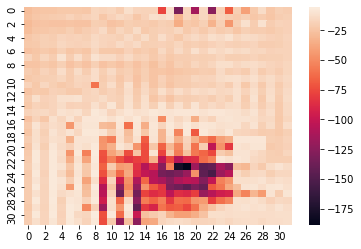

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

data = np.array(t_model.get_weights()[-1])
print(data)

heat_map = sn.heatmap(cam)
plt.savefig("with_attention_5_activation.png")

#### Without attention


[ 0.09777895 -0.1805529 ]


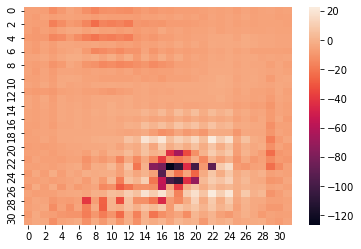

In [0]:
import seaborn as sn
import matplotlib.pyplot as plt

data = np.array(t_model.get_weights()[-1])
print(data)

heat_map = sn.heatmap(cam)
plt.savefig("without_attention_5_concat_proj_BN.png")

#### Printing model architecture

In [0]:
ta_model = Deeplabv3(weights=None, input_shape=(256,256,3), classes=2,activation='sigmoid')
p = '/content/drive/My Drive/Deeplabv3plus_only_potholes_55_0.001_adam_1_Trained_idd_log_0.5_3_channels/'
ta_model.load_weights(p + 'model.h5')

x shape in encoder :  (?, 32, 32, 320)
b4 shape after upsample :  (?, 32, 32, 256)
b0 shape before upsample :  (?, 32, 32, 256)
b0 shape flatten :  (?, 32, 32, 256)
b4 shape flatten :  (?, 32, 32, 256)
Using sigmoid


In [0]:
stringlist = []
ta_model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
print(short_model_summary)

Model: "deeplabv3plus"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 128, 128, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
Conv_BN (BatchNormalization)    (None, 128, 128, 32) 128         Conv[0][0]                       
__________________________________________________________________________________________________
Conv_Relu6 (Activation)         (None, 128, 128, 32) 0           Conv_BN[0][0]                    
______________________________________________________________________________________

## Experimental codes (Optional)

In [0]:
test_path = "/content/drive/My Drive/Subset 1 (Simplex) gt/"
test_pathx = '/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/' + 'predictionsFullSizeSimplexGt/'
test_pathy = '/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/' + 'predictionsFullSizeSimplex/'
test_pathz = '/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/' + 'predictionsMergedSimplex/'
pred = test_pathy.split(" ")[0] + "\ " + test_pathy.split(" ")[1]
predx = test_pathx.split(" ")[0] + "\ " + test_pathx.split(" ")[1]
predz = test_pathz.split(" ")[0] + "\ " + test_pathz.split(" ")[1]
!mkdir $pred
!mkdir $predx
!mkdir $predz

# Getting potholes annotations
# locComplexTest = "/content/drive/My Drive/Subset 1 (Simplex)/simpleTestFullSizeAllPotholesSortedFullAnnotation.txt"
# complexTestLabels = decrypt(locComplexTest)

test_batch = os.listdir(test_path)

for i,sample in enumerate(test_batch):
    img_path = test_path + sample
    
    if '(' in sample:
      continue

    print(img_path)
    
    x = load_image(img_path)

    x1 = x[:1850,:]
    h,w,_ = x.shape
    
    y = x1[:,w//2:w]
    x = x1[:,:w//2]
    
    prediction, xTemp = predict(x,1)

    # label = complexTestLabels[sample[:-4]]
    
    # numLabels = int(label[0])
    # for i in range(numLabels):
    #     x,y,w,h = int(label[i*4 + 1]),int(label[i*4 + 2]),int(label[i*4 + 3]),int(label[i*4 + 4])
    #     prediction = cv2.rectangle(prediction, (x,y), (x+w,y+h), (0,0,255), -1)
    
    print(test_pathy + sample)
    merged = cv2.hconcat([xTemp, prediction])
    
    print(cv2.imwrite(test_pathx + str(i) + "_gtFine_polygons.png" , cv2.cvtColor(y, cv2.COLOR_BGR2RGB)))
    print(cv2.imwrite(test_pathy + str(i) + "_gtFine_polygons.png" , cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)))
    print(cv2.imwrite(test_pathz + str(i) + "_gtFine_polygons_merged.jpg" , cv2.cvtColor(merged, cv2.COLOR_BGR2RGB)))


mkdir: cannot create directory ‘/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/predictionsFullSizeSimplex/’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/predictionsFullSizeSimplexGt/’: File exists
mkdir: cannot create directory ‘/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/predictionsMergedSimplex/’: File exists
/content/drive/My Drive/Subset 1 (Simplex) gt/G0010109.JPG
/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/predictionsFullSizeSimplex/G0010109.JPG
True
True
True
/content/drive/My Drive/Subset 1 (Simplex) gt/G0010110.JPG
/content/drive/My Drive/Deeplabv3plus_100_1e-06_nadam_1_cityscapes_jaccard_loss_kitti_log_0.5_2_channels/predictionsFullSizeSimplex/G0010110.JPG
True
True
True
/content/drive/My Drive/S

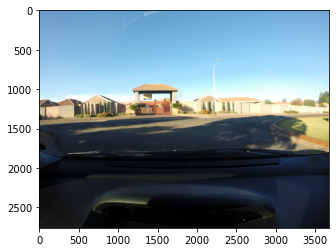

True

In [0]:
import matplotlib.pyplot as plt
img = load_image("/content/G0010033.JPG")
plt.imshow(img)
plt.show()
cv2.imwrite('img.png',img)
# img = load_image("/content/371407_leftImg8bit.png")
# plt.imshow(img)
# plt.show()

### Nadam , 1e-6, 1, 150, Cityscapes, dropout 0.5, cropped

In [0]:
pred = predict("/content/G0010033.JPG")

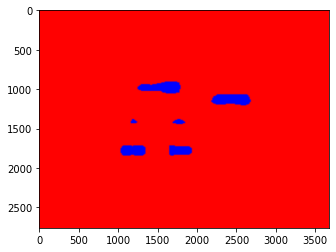

True

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred[0])
plt.show()
cv2.imwrite('pred.png',pred[0])

In [0]:
pred = predict("/content/371407_leftImg8bit.png")

(1, 512, 512)


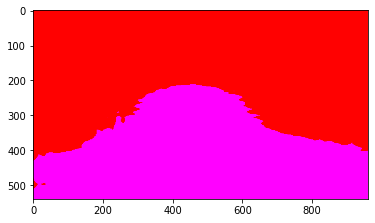

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred[0])
plt.show()

In [0]:
pred = predict("/content/G0011585.JPG")

(1, 512, 512)


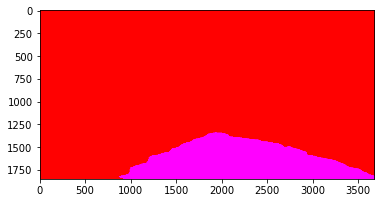

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred[0])
plt.show()

### Nadam , 1e-6, 1

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

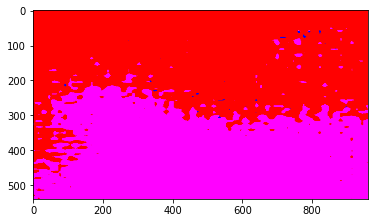

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-6, 2

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

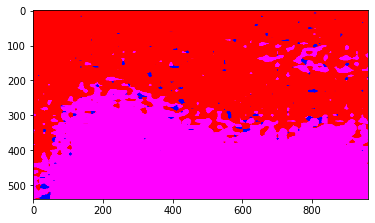

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-6, 3

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

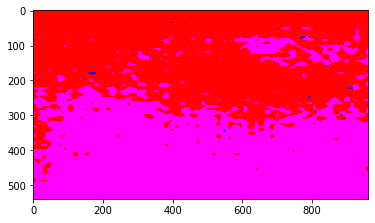

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-5, 3

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

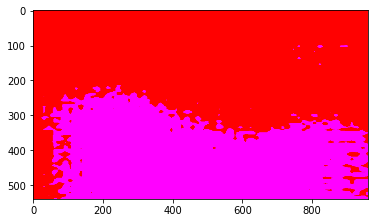

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-7, 3, 150

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

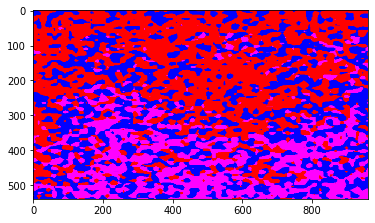

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-6, 3, 150, Cityscapes, dropout 0.5

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

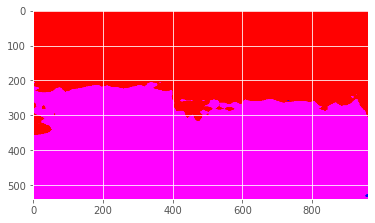

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

In [0]:
pred = predict("/content/371407_leftImg8bit.png")

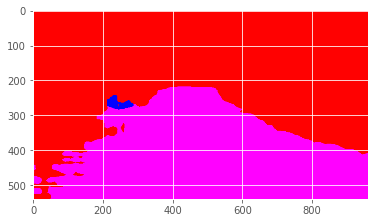

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-6, 3, 200, dropout 0.5

In [0]:
pred = predict("/content/371407_leftImg8bit.png")

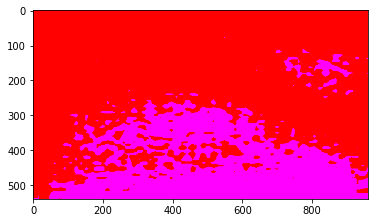

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

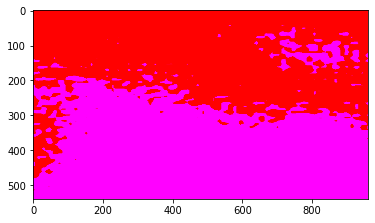

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-6, 4, 200, cityscapes, dropout 0.5

In [0]:
pred = predict("/content/371407_leftImg8bit.png")

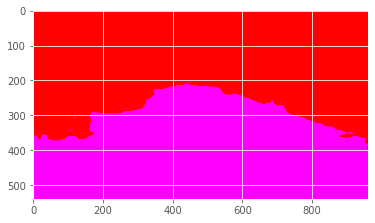

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

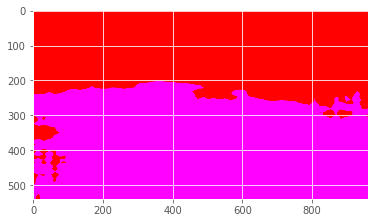

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

### Nadam , 1e-5, 5, 200, cityscapes, dropout 0.5


In [0]:
pred = predict("/content/371407_leftImg8bit.png")

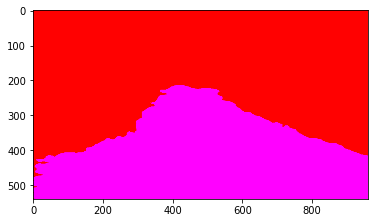

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

In [0]:
pred = predict("/content/431140_leftImg8bit.png")

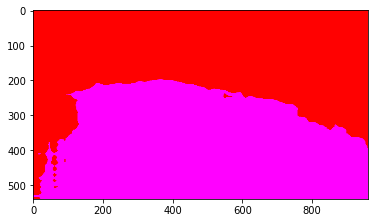

In [0]:
import matplotlib.pyplot as plt
plt.imshow(pred)
plt.show()

In [0]:
import numpy as np
import cv2
import os

test_path = "/content/drive/My Drive/Subset 1 (Simplex)/Test Data/"
test_batch = os.listdir(test_path)

# Getting potholes annotations
locSimplex = "/content/drive/My Drive/Subset 1 (Simplex)/simpleTestFullSizeAllPotholesSortedFullAnnotation.txt"
simplexLabels = decrypt(locSimplex)

for sample in test_batch:
    if '(' in sample:
      continue
    
    img_path = test_path + sample

    ground_truth = load_image("/content/drive/My Drive/Subset 1 (Simplex) Test gt/" + sample)
    h,w,_ = ground_truth.shape
    ground_truth = ground_truth[:,w//2:w]

    label = simplexLabels[sample[:-4]]
    numLabels = int(label[0])
    for i in range(numLabels):
        x,y,w,h = int(label[i*4 + 1]),int(label[i*4 + 2]),int(label[i*4 + 3]),int(label[i*4 + 4])
        ground_truth = cv2.rectangle(ground_truth, (x,y), (x+w,y+h), (0,0,255), -1)
    ground_truth = cv2.resize(ground_truth, dsize=(512, 512))

    print(cv2.imwrite("/content/drive/My Drive/Subset 1 (Simplex) Test gt/withPotholesIDD/" + sample , cv2.cvtColor(ground_truth,cv2.COLOR__BGR2RGB)))

In [0]:
import pickle

data = None
with open("/content/drive/My Drive/data_256_all.pickle",'rb') as f:
  data = pickle.load(f)

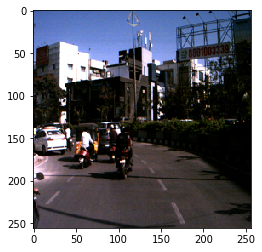

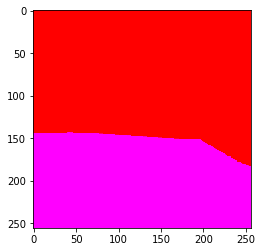

In [0]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(data['X_train'][0])
plt.show()

plt.imshow(cv2.cvtColor(data['Y_train'][0],cv2.COLOR_BGR2RGB))
plt.show()